# Purpose

Of this notebook is to look at the output of the pipeline.

In [1]:
import pandas as pd

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ls

Detecting changepoints in gaze.ipynb  __temp__.png
Examine Pipeline Output.ipynb         notebook_data/
Solve the fucking problem.ipynb       planogram.jpg
__temp__.mp4


In [3]:
cd notebook_data/

/Users/wonjunetai/src/github.com/vendlytics/notebooks/visualization/notebook_data


In [4]:
ls

dist_estimate.txt
frame_to_bbox.txt
frame_to_gaze.txt
one_hot_encoding_seconds.csv
one_hot_in_seconds.csv
output.txt
output_without_bbx.csv
output_without_bbx_in_seconds.csv
output_without_bbx_in_seconds.tsv
output_without_bbx_predictions_in_seconds.csv
product_plane_coords.txt
product_vectors.txt
shelf_plane_norm.txt
smooth_prediction.npy
videos/


In [5]:
cd ..

/Users/wonjunetai/src/github.com/vendlytics/notebooks/visualization


In [6]:
df = pd.read_csv('notebook_data/output_without_bbx.csv')
product_cols = ['product 0', 'product 1', 'product 2', 'product 3', 'product 4', 'product 5', 'product 6']
distances = df[product_cols].values # num_frames x num_products

In [7]:
df[['frame_number'] + product_cols].head()

,frame_number,product 0,product 1,product 2,product 3,product 4,product 5,product 6
0,682,48735.194294,52366.008020,70824.702062,69522.091291,86457.723928,98301.918712,97261.722187
1,683,53309.501842,59445.834076,79318.483516,76381.838329,95110.530319,105297.263553,105517.677365
2,684,60206.690609,67027.724487,86857.476182,84730.194327,103866.212834,113999.627570,114497.291632
3,685,63865.200455,71795.067252,92260.732177,89131.793518,109126.312331,118299.799729,119482.663545
4,686,52883.766899,60596.842788,81676.544361,76289.659515,96261.952010,104791.915816,106001.982407


Convert from frame to seconds.

In [8]:
df['seconds'] = df['frame_number'].apply(lambda x: x / 30)
df.drop(['frame_number', 'Unnamed: 0'], axis='columns')

,x_angle,y_angle,z_angle,product 0,product 1,product 2,product 3,product 4,product 5,product 6,seconds
0,-9.101837,-4.555634,-0.912392,48735.194294,52366.008020,70824.702062,69522.091291,86457.723928,98301.918712,97261.722187,22
1,-13.126450,-1.246826,-1.620468,53309.501842,59445.834076,79318.483516,76381.838329,95110.530319,105297.263553,105517.677365,22
2,-15.179825,2.938110,1.712021,60206.690609,67027.724487,86857.476182,84730.194327,103866.212834,113999.627570,114497.291632,22
3,-17.545975,4.570633,-1.424942,63865.200455,71795.067252,92260.732177,89131.793518,109126.312331,118299.799729,119482.663545,22
4,-15.356705,-1.959663,3.927353,52883.766899,60596.842788,81676.544361,76289.659515,96261.952010,104791.915816,106001.982407,22
5,-27.130928,5.373611,10.093445,72470.831120,84848.568312,108444.848040,98714.828580,122383.518887,126268.775945,130754.865065,23
6,-6.412575,3.136528,4.502365,60277.527960,61282.896769,76103.378035,82305.359599,96628.636872,112311.774903,109321.015719,23
7,1.557159,-2.052383,11.110855,56488.724584,51639.403326,61264.678988,73368.714039,82751.850534,102566.791558,96597.855305,23
8,10.212143,-2.168350,16.243759,65113.760142,54298.605753,54636.506329,77205.668624,79590.776107,105192.946823,95337.475140,23
9,-2.579201,0.544678,10.786102,57602.451839,55919.630213,68569.939345,77380.786620,89526.825049,107112.737106,102753.641817,23


In [9]:
distances -= np.min(distances, axis=1)[:, np.newaxis]

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


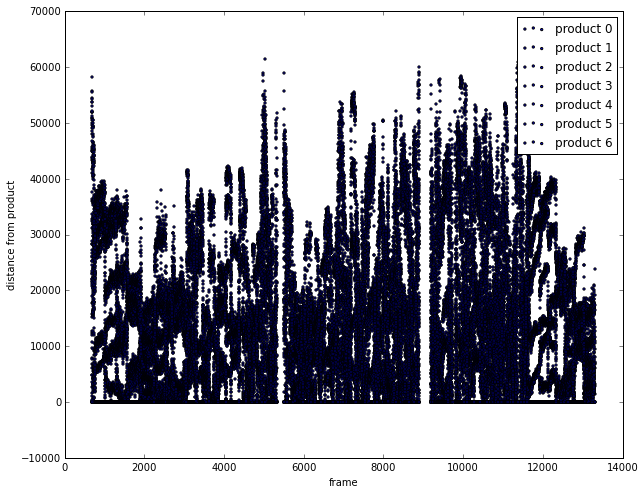

In [10]:
MARKER_SIZE=5

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

x = df.T.loc['frame_number']
ax1.scatter(x, distances[:, 0], s=MARKER_SIZE)
ax1.scatter(x, distances[:, 1], s=MARKER_SIZE)
ax1.scatter(x, distances[:, 2], s=MARKER_SIZE)
ax1.scatter(x, distances[:, 3], s=MARKER_SIZE)
ax1.scatter(x, distances[:, 4], s=MARKER_SIZE)
ax1.scatter(x, distances[:, 5], s=MARKER_SIZE)
ax1.scatter(x, distances[:, 6], s=MARKER_SIZE)

# plt.ylim(-10, 100)
plt.xlabel('frame')
plt.ylabel('distance from product')
plt.legend(product_cols)

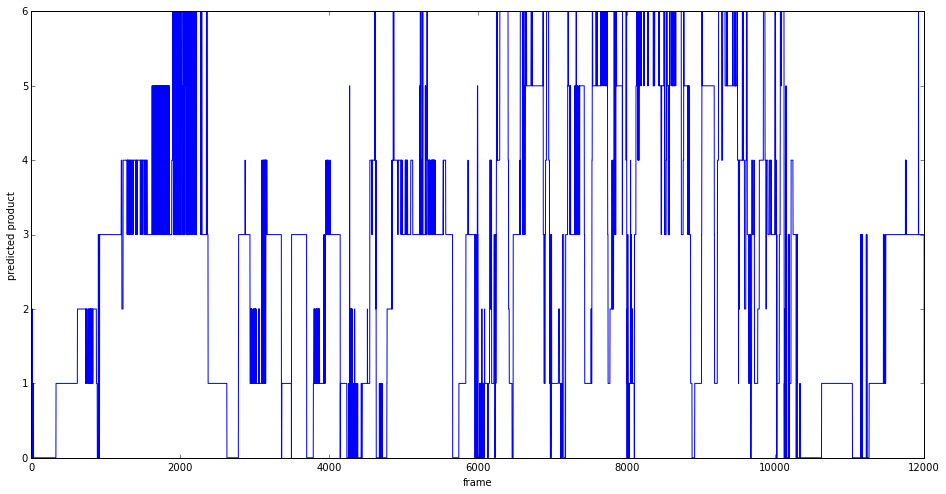

In [11]:
predictions = np.argmin(distances, axis=1) # num_frames
def plot_predictions(predictions):
    plt.figure(figsize=(16, 8))
    plt.xlabel('frame')
    plt.ylabel('predicted product')
    plt.plot(range(len(predictions)), predictions)
plot_predictions(predictions)

Experimenting with medial filtering based prediction smoothing - not used outside of the plot below.

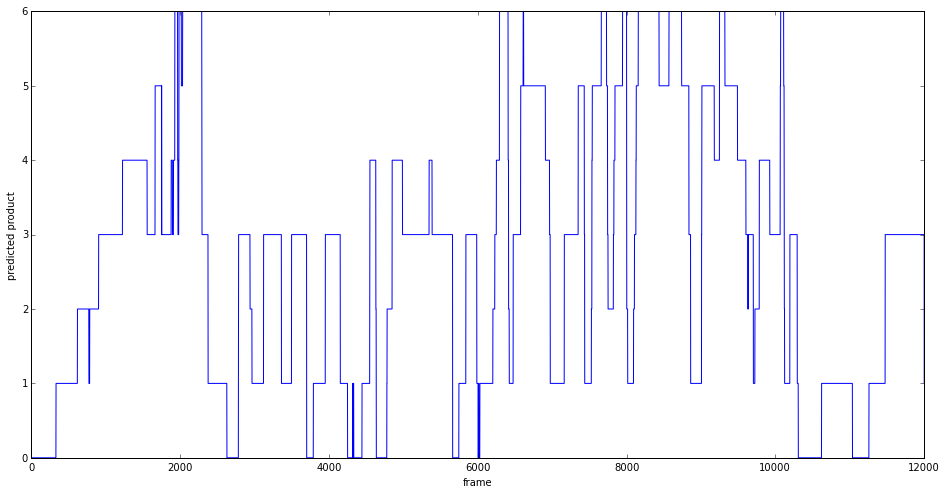

In [12]:
from scipy.signal import medfilt

smoothed_predictions = medfilt(predictions, kernel_size=89)
plot_predictions(smoothed_predictions)

In [13]:
df['predictions'] = pd.Series(predictions)

In [14]:
df = df.drop(['Unnamed: 0', 'frame_number', 'x_angle', 'y_angle', 'z_angle'], axis='columns')

In [15]:
seconds = df['seconds']

In [16]:
print(df['predictions'].head())
df = pd.get_dummies(df['predictions'])
df['seconds'] = pd.Series(seconds)

0    0
1    0
2    0
3    0
4    0
Name: predictions, dtype: int64


Write to CSV.

In [17]:
ls

Detecting changepoints in gaze.ipynb  __temp__.png
Examine Pipeline Output.ipynb         notebook_data/
Solve the fucking problem.ipynb       planogram.jpg
__temp__.mp4


In [18]:
df.to_csv('notebook_data/one_hot_encoding_seconds.csv')

In [19]:
df = df.from_csv('notebook_data/one_hot_encoding_seconds.csv')

In [20]:
saved_df = df.copy()

In [21]:
df

,0,1,2,3,4,5,6,seconds
0,1,0,0,0,0,0,0,22
1,1,0,0,0,0,0,0,22
2,1,0,0,0,0,0,0,22
3,1,0,0,0,0,0,0,22
4,1,0,0,0,0,0,0,22
5,1,0,0,0,0,0,0,23
6,1,0,0,0,0,0,0,23
7,0,1,0,0,0,0,0,23
8,0,1,0,0,0,0,0,23
9,0,1,0,0,0,0,0,23


### Smoothing and Interpolation

Averaging? Making the ASSUMPTION that person needs to look at product for one second (30 frames) to count as a product view.

In [23]:
%%timeit
window_size = 45

for product in [str(p) for p in range(7)]:
    for i in range(0, len(df) - window_size, window_size):
        majority_vote = df[product][0 + i:window_size + i].mode()[0]
        df[product][0 + i:window_size + i] = pd.Series([majority_vote for _ in range(window_size)])

1 loop, best of 3: 1.06 s per loop


From one hot back to categorical.

In [24]:
cat_prediction = df[['0', '1', '2', '3', '4', '5', '6']].idxmax(axis=1).tolist()
np.save('smooth_prediction', cat_prediction)
len(cat_prediction)

12000

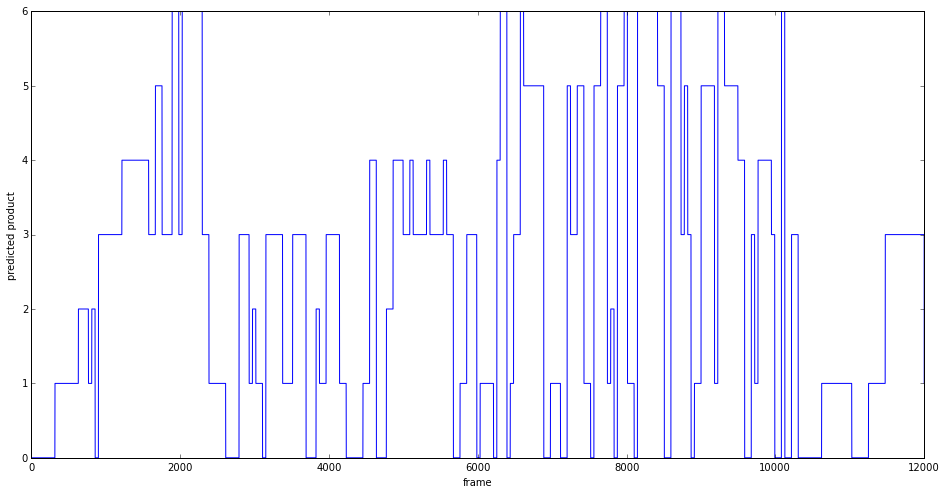

In [25]:
plt.figure(figsize=(16, 8))
plt.xlabel('frame')
plt.ylabel('predicted product')
plt.plot(range(len(predictions)), cat_prediction) # TODO

### Building a representation of the gaze transitions

Would be best to make a graph, with the nodes being product and frame, and edge weights being length of time between 

More analysis

In [ ]:
test = df.iterrows().__next__()

In [ ]:
test[1]

In [ ]:
prev = None
total_times = [0 for i in range(7)]
rows = df.iterrows()
cur = rows.__next__()

while cur:
    if cur == 
    cur = rows.__next__()